### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [734]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

# so we don't need to explicitly show our plots
%matplotlib inline

# Set a couple variables I'm using elsewhere
palette = 'Set1'

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [735]:
ratings = pd.read_csv('Data.csv')
movies = pd.read_csv('item.csv')
users = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

#### Users

In [736]:
users.info() # information on our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [737]:
users.shape # 943 rows and 5 columns

(943, 5)

In [738]:
# count, mean, std, and 5-point summary for each quantitative column
users.describe() 

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [739]:
users.isnull().sum() # any null values?

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

#### Movies

In [740]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [741]:
movies.shape

(1681, 22)

In [742]:
movies.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [743]:
movies.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### Ratings

In [744]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [745]:
ratings.shape

(100000, 4)

In [746]:
ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [747]:
ratings.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [748]:
# Create an object that is a list of our genre columns
# This will be useful later when we want to do something to only these columns
only_genres = movies.drop(columns=['movie id', 'movie title', 'release date'])

# Get the sum for each genre column
only_genres.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [749]:
print('There are ' + str(movies.shape[0]) + ' total movies')

There are 1681 total movies


In [750]:
# Drop the movie where the genre 'unknown' has a value
movies_known_genre = movies[movies['unknown'] != 1]

print('There are ' + str(movies_known_genre.shape[0]) + ' movies with a known genre')

There are 1680 movies with a known genre


```python
# It's not totally clear if we should be using the dataset with or without this movie
# moving forward, so I am using the dataset with it
```

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [751]:
# Build of a list of all genre columns
# For shorter lists we could just do this manually
col_list = list(movies)
col_list.remove('movie id')
col_list.remove('release date')
col_list.remove('movie title')
if 'num_genres' in col_list:
    col_list.remove('num_genres')

# Sum this trimmed list and add it as a new column to our movies data frame
movies['num_genres'] = movies[col_list].sum(axis=1)

In [752]:
# Display movie name and number of genres
movies[['movie title', 'num_genres']]

,movie title,num_genres
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [753]:
# Display number of movies with more than one genre
print(movies.loc[movies['num_genres'] > 1].shape[0])

849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [754]:
# Add a new column with release year; populate it with the year value of our release date
movies['release_year'] = pd.DatetimeIndex(movies['release date']).year

**Univariate plot: Rating**

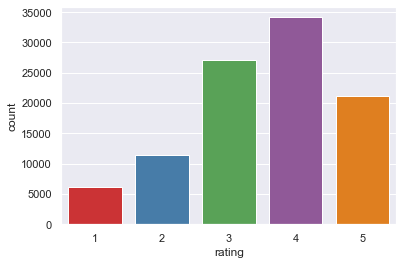

In [755]:
# Ratings occurrence
sns.countplot(ratings['rating'], palette=palette);

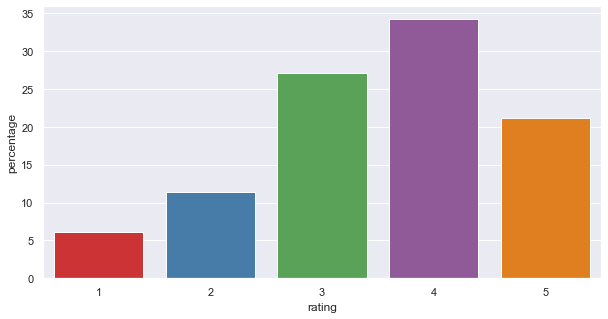

In [756]:
# Ratings frequencies

r_counts = ratings.groupby('rating', as_index=False)['user id'].count().rename(columns={'user id':'count'})
r_counts['percentage'] = (r_counts['count'] / r_counts['count'].sum())*100

plt.figure(figsize=(10,5))
chart = sns.barplot(data=r_counts,
                    x='rating',
                    y='percentage',
                    palette=palette);

**Univariate plot: Age**

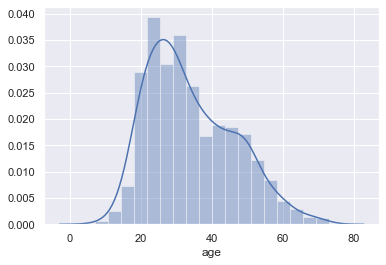

In [757]:
# Age is a continuous variable so seeing the KDE is useful here
sns.distplot(users['age']);

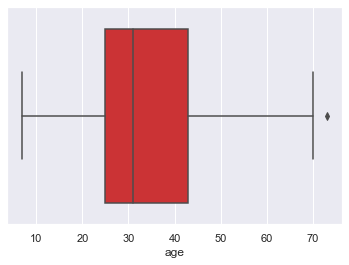

In [758]:
# In addition to the distplot above, a box plot shows us there is an outlier value and we have a slight right skew to the data
sns.boxplot(x='age', data=users, palette=palette);

**Univariate plot: Release year**

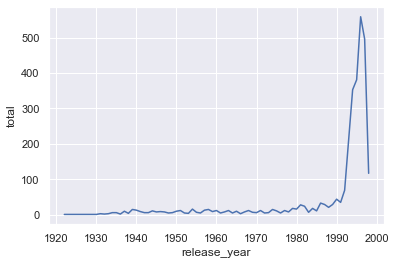

In [759]:
# Our data is either:
#   * Heavily biased toward new movies
#   * Indicative that a *lot* more movies have been released lately compared to the early 20th century (unlikely)

# Group by release year and sum values
releases = movies.groupby(['release_year']).sum()

# Sum the genre values into new column 'total'
releases['total'] = releases[list(only_genres.columns)].sum(axis=1)
releases.reset_index(inplace=True)

sns.lineplot(y='total', x='release_year', data=releases);

**Univariate plot: Gender**

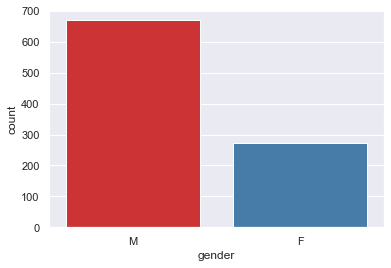

In [760]:
# Gender occurrences

sns.countplot(users['gender'], palette=palette);

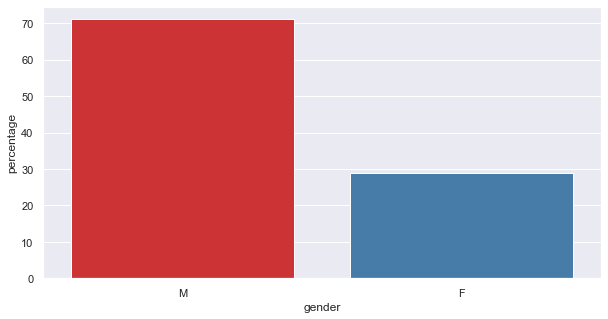

In [761]:
# Gender frequencies

gender_counts = users.groupby('gender', as_index=False)['user id'].count().rename(columns={'user id':'count'})
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count'].sum())*100

plt.figure(figsize=(10,5))
chart = sns.barplot(data=gender_counts,
                    x='gender',
                    y='percentage',
                    order=['M','F'], # Re-order to match default countplot above
                    palette=palette);

**Univariate plot: Occupation**

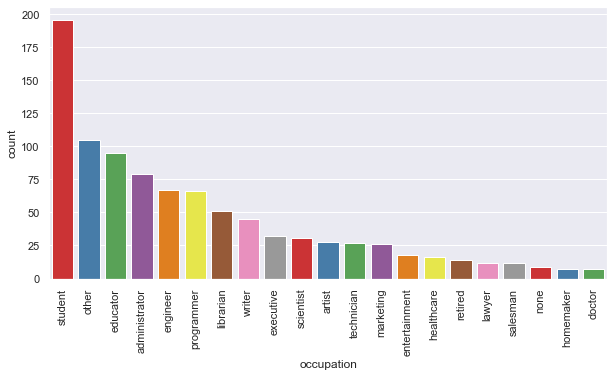

In [762]:
# Occupation occurrences

order = users['occupation'].value_counts().index

plt.figure(figsize=(10,5))
chart = sns.countplot(data=users,
                      x='occupation',
                      order=order,
                      palette=palette)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

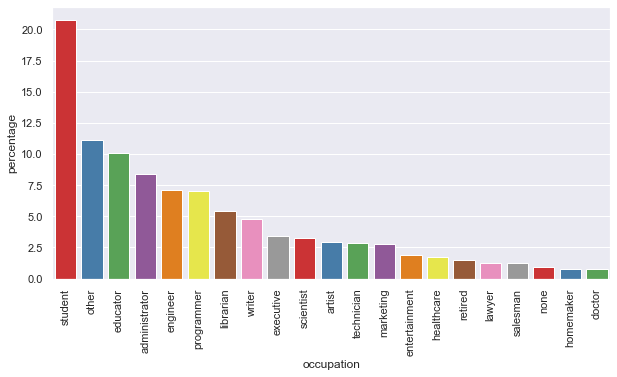

In [763]:
# Occupation frequencies

occ_counts = users.groupby('occupation', as_index=False)['user id'].count().rename(columns={'user id':'count'})
occ_counts['percentage'] = pd.Series(occ_counts.loc[occ_counts.index]['count']/occ_counts['count'].sum(), index=occ_counts.index)*100

plt.figure(figsize=(10,5))
chart = sns.barplot(data=occ_counts,
                    x='occupation',
                    y='percentage',
                    order=order,
                    palette=palette)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

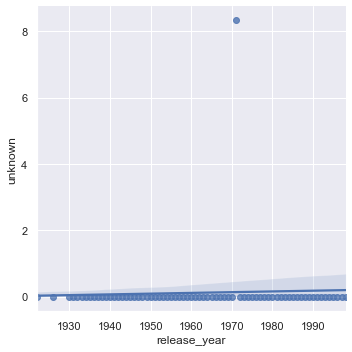

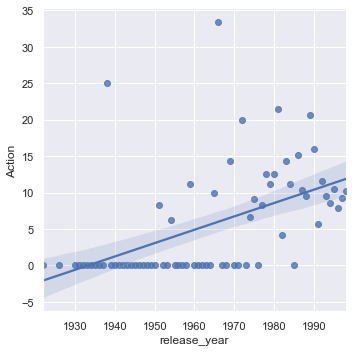

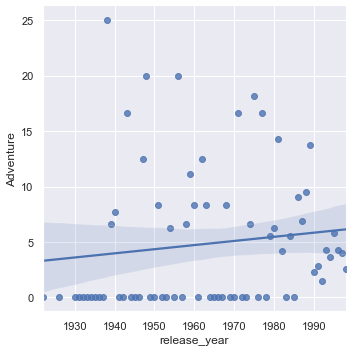

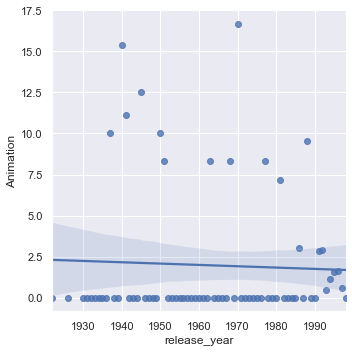

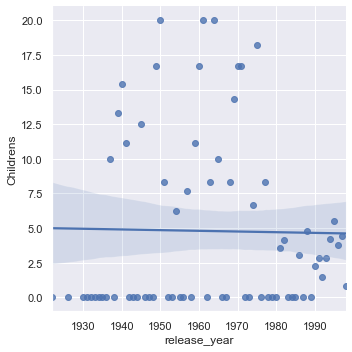

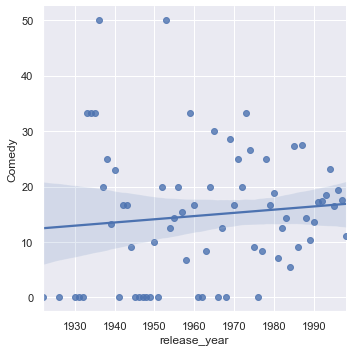

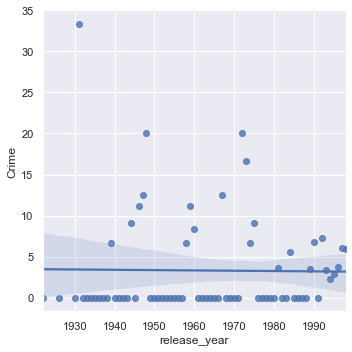

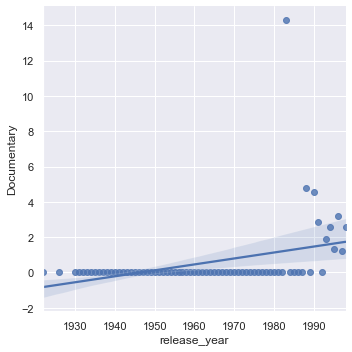

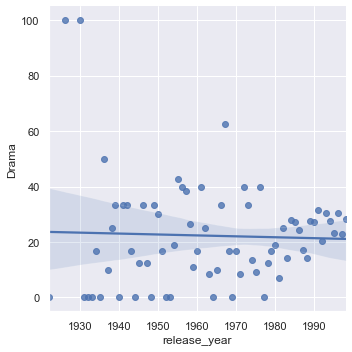

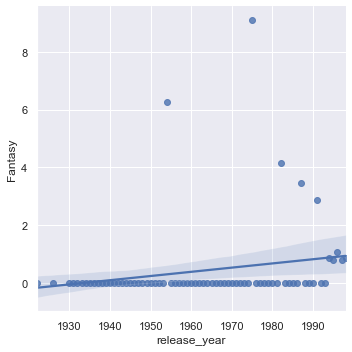

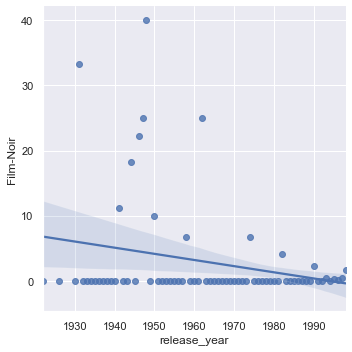

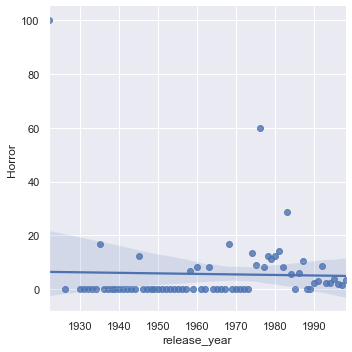

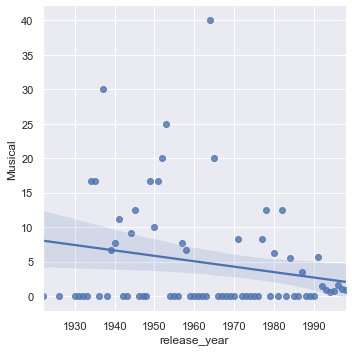

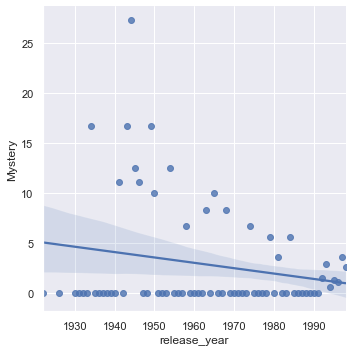

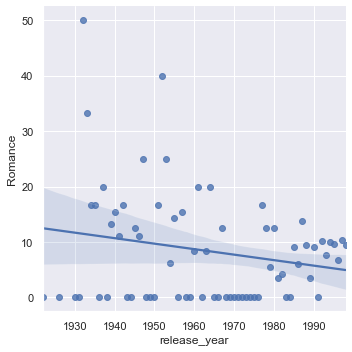

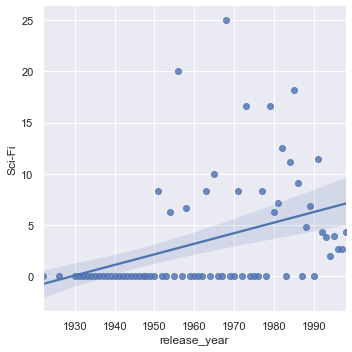

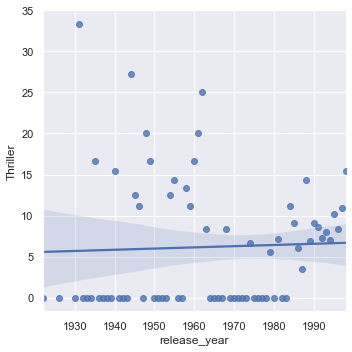

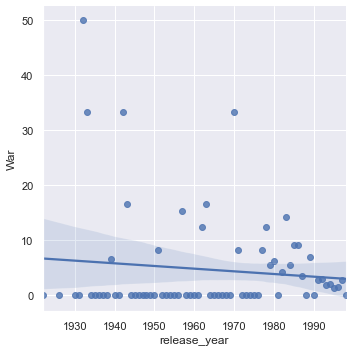

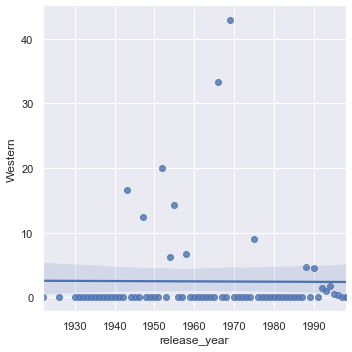

In [764]:
# Drop columns we don't care about; group by release year and sum values
releases = movies.drop(['movie id', 'num_genres'], axis='columns').groupby(['release_year']).sum()

# Sum the genre values into new column 'total'
releases['total'] = releases[list(only_genres.columns)].sum(axis=1)

# Replace the release counts with release percentages
releases[list(only_genres.columns)] = releases[list(only_genres.columns)].div(releases['total'], axis=0)*100

releases.reset_index(inplace=True)

# Plot changes in genre popularity as a percentage of total releases
for genre in only_genres.columns:
    sns.lmplot(x='release_year', y=genre, data=releases);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [765]:
# Merge the data frames and keep the two things we care about - movie title and rating (and ID to join on)
movie_ratings = pd.merge(movies[['movie title', 'movie id']], ratings[['movie id', 'rating']], on='movie id')

# Remove movies that don't have more than 100 ratings
movie_ratings = movie_ratings[movie_ratings.groupby('movie id')['movie id'].transform('count')>100].copy()

# Group by average rating
grouped_ratings = movie_ratings.groupby('movie title', as_index=False)['rating'].mean()

# Sort by rating (descending)
grouped_ratings.sort_values('rating', ascending=False, inplace=True)

grouped_ratings.reset_index(inplace=True, drop=True)

# Make the index start at one so the index matches the movie's place in our sorted list
grouped_ratings.index += 1

# Select the top 25 records
grouped_ratings.head(25)

,movie title,rating
1,"Close Shave, A",4.491071
2,Schindler's List,4.466443
3,"Wrong Trousers, The",4.466102
4,Casablanca,4.456790
5,"Shawshank Redemption, The",4.445230
6,Rear Window,4.387560
7,"Usual Suspects, The",4.385768
8,Star Wars,4.358491
9,12 Angry Men,4.344000
10,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### *Setup*

In [766]:
# We'll reuse movie_ratings from above, but keep all columns for now
movie_ratings = pd.merge(movies, ratings, on='movie id')

# Now add the users data to merge everything together
all_data = pd.merge(movie_ratings, users, on='user id')

# Drop the columns we don't care about
all_data.drop(['movie id', 
               'movie title', 
               'release date', 
               'user id', 
               'rating', 
               'timestamp', 
               'age', 
               'occupation', 
               'zip code',
               'num_genres'], axis=1, inplace=True)

In [767]:
# releases[list(only_genres.columns)] = releases[list(only_genres.columns)].div(releases['total'], axis=0)*100

# Utilize one-hot encoding to get our reviewer's gender in the same columnar format as our genres
oh_data = pd.get_dummies(all_data, prefix='Reviewer', columns=['gender'])

# Create a function to parse what we want to parse
def gender_split(genre):
    df = all_data[[genre, 'gender']].groupby('gender').sum().rename(columns={genre:'Count'})
    df['Percentage'] = pd.Series(df.loc[df.index]['Count'] / df['Count'].sum(), index=df.index)*100
    return df

#### *Men watch more drama than women*

In [768]:
drama = gender_split('Drama')
drama

,Count,Percentage
gender,,
F,11008,27.59243
M,28887,72.40757


Based on review count alone, men **do** watch drama more than women.

#### *Women watch more science fiction than men*

In [769]:
scifi = gender_split('Sci-Fi')
scifi

,Count,Percentage
gender,,
F,2629,20.652003
M,10101,79.347997


Based on review count alone, women **do not** watch science fiction more than men.

#### *Men watch more romance than women*

In [770]:
romance = gender_split('Romance')
romance

,Count,Percentage
gender,,
F,5858,30.101228
M,13603,69.898772


Based on review count alone, men **do** watch romance more than women.